## Prerequsite test
#### 1. 
In the Matrix multiplication of a $(n,k)$ and $(k,m)$ matrix, the resultant matrix has $ nm $ entries. Hence the process used for one single element in the product matrix, has to be repeated $n*k$ times. For one element in the product matrix, we need to do k multiplications and k-1 additions. Hence total number of additions are $ n*k*(m-1) $ and number of multiplication are $ n*k*m $.

#### 2. 
Using Lists of list:

In [ ]:
import timeit
import random as rand
import statistics

n = int(input("Enter value of n"))
k = int(input("Enter value of k"))
m = int(input("Enter value of m"))
arr1 = [[rand.randint(0,100) for i in range(k)] for j in range(n)]
arr2 = [[rand.randint(0,100) for t in range(m)] for l in range(k)]
ans = [[0 for m in range(m)] for p in range(n)]

def func(arr1,arr2,ans):
  for i in range(n):
    for j in range(m):
        for l in range(k):
            ans[i][j] += arr1[i][l]*arr2[l][j]
  return

time = timeit.repeat(lambda: func(arr1,arr2,ans), number=1000)

mean_time = statistics.mean(time)
median_time = statistics.median(time)
mode_time = statistics.mode(time)
std_dev = statistics.stdev(time)

print("Mean time:", mean_time)
print("Median time:", median_time)
print("Mode time:", mode_time)
print("Standard deviation:", std_dev)

Enter value of n10
Enter value of k10
Enter value of m10
Mean time: 0.2900986109999394
Median time: 0.2854831109998486
Mode time: 0.2841427929997735
Standard deviation: 0.01102581187817426


Using numpy:

In [ ]:
import numpy as np
import timeit
import random as rand

n = int(input("Enter value of n"))
k = int(input("Enter value of k"))
m = int(input("Enter value of m"))
arr1 = np.arange(n*k).reshape(n,k)
arr2 = np.arange(m*k).reshape(k,m)
def func(arr1,arr2):
  result = np.dot(arr1,arr2)
  return


time = timeit.repeat(lambda: func(arr1,arr2), number=1000)

mean_time = statistics.mean(time)
median_time = statistics.median(time)
mode_time = statistics.mode(time)
std_dev = statistics.stdev(time)

print("Mean time:", mean_time)
print("Median time:", median_time)
print("Mode time:", mode_time)
print("Standard deviation:", std_dev)


Enter value of n10
Enter value of k10
Enter value of m10
Mean time: 0.004528474799917604
Median time: 0.004970742999830691
Mode time: 0.005781236000075296
Standard deviation: 0.0014258919924332771


For small matrices, the iterative method is faster, while for the large matrices, numpy is faster.
Numpy is faster because it integrates C in Python and C has smaller execution time than python so, Numpy can perfrom better than python code.
Also numpy breaks tasks into smaller segments and runs them parallely, which in turn improves its performance. 

#### 3.
For finding the highest element, one traversals required. for second largest 2 are required and so on. So for median element it depends on whether the number of elements are odd or even: 
<br>
**n is odd**: median is the $ (\frac{n}{2} + 1)^{th} $ element. It requires $ \frac{n}{2} + 1$ traversals.
<br>
**n is even**: median is the average of the middle two elements, that is average of $ (\frac{n}{2})^{th} $ and $ (\frac{n}{2} + 1)^{th} $ element. It requires $ \frac{n}{2} + 1$ passes.
<br>
Every traversal takes O(n) time, Therefore, time complexity of the algorithm is
$ O(n)*O(\frac{n}{2} + 1) = O(n^2)$
<br>

An optimized solution would be to sort the array first and then take out its middle element. The sorting takes $O(n\log{n})$ and searching the miidle element will take $O(1)$ time. Hence total time complexity of this process is $O(n\log{n})$.

<br>

In [ ]:
## code for all 3 processes

import timeit
import random as rand
import statistics
import numpy as np

arr = [rand.randint(0,10000) for i in range(1000)]
l = len(arr)

## code for iterative procedure
def func_itr(arr):
  visited = [0 for i in range(l)]
  for i in range(l // 2 + 1):
    index = 0
    prev = 0
    max = -1
    for j in range(l):
      if arr[j]>max and visited[j]==0:
        prev = index
        index = j
        max = arr[j]
    visited[index] == 1
  if l%2 == 0:
    median = (arr[index] + arr[prev])/2
  else:
    median = arr[index]
  return median

## code for optimized procedure (sorting)
def func_opt(arr):
  arr.sort()
  if l%2 == 0:
    median = (arr[l // 2 - 1] + arr[l // 2]) / 2
  else:
    median = arr[l // 2]
  return median

## code for numpy median method
def func_np(arr):
  median = np.median(arr)
  return

time_itr = timeit.repeat(lambda: func_itr(arr), number=1000)
time_opt = timeit.repeat(lambda: func_opt(arr), number=1000)
time_np = timeit.repeat(lambda: func_np(arr), number=1000)

mean_time_itr = statistics.mean(time_itr)
mean_time_opt = statistics.mean(time_opt)
mean_time_np = statistics.mean(time_np)

print("Mean time for iterative process:", mean_time_itr)
print("Mean time for optimized process:", mean_time_opt)
print("Mean time for numpy median :", mean_time_np)




Mean time for iterative process: 34.978862900400415
Mean time for optimized process: 0.0064175855994108135
Mean time for numpy median : 0.11318778560053033


From the above observation, iterative process is slower than the rest of the processes. Optimized solution does better than numpy median.

#### 4. 
$ f = x^2y + y^3\sin{x} $ 
 <br>
$ df/dx = 2xycos(x) + y^3cos(x) $, <br> $df/dy = x^2 + 3y^2*sin(x)$

#### 5.

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
from jax import grad

def function(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

grad_function = grad(function, argnums=(0, 1))

x = [np.random.random()*10 for i in range(5)]
y = [np.random.random()*10 for i in range(5)]

analytical_gradient = []
numerical_gradient = []
for i in range(5):
  analytical_gradient.append([2*x[i]*y[i] + y[i]**3*jnp.cos(x[i]), x[i]**2 + 3*y[i]**2*jnp.sin(x[i])])
  numerical_gradient.append(grad_function(x[i], y[i]))

print(x)
print(y)
print(analytical_gradient[0][0],analytical_gradient[1][0],analytical_gradient[2][0],analytical_gradient[3][0],analytical_gradient[4][0])
print(numerical_gradient[0][0], numerical_gradient[1][0], numerical_gradient[2][0], numerical_gradient[3][0], numerical_gradient[4][0])


[8.555326146239606, 0.07441911369880039, 3.3438624513490476, 5.085903955628485, 8.532587422467655]
[5.285285000152934, 7.57033019697901, 7.702139314056867, 1.4984740623335557, 3.047649565408226]
-4.8296585 433.78076 -396.0888 16.46994 34.24009
-4.8296585 433.78076 -396.0888 16.469942 34.24009


The gradient from analytical and numerical solution give results which are very close (equal in some cases), which helps in confirming our solution.

#### 6.

In [ ]:
import sympy as sym

x, y = sym.symbols('x y')

f = x**2 * y + y**3 * sym.sin(x)

dx = sym.diff(f, x)
dy = sym.diff(f, y)

print("df/dx =",dx)
print("df/dy =",dy)

df/dx = 2*x*y + y**3*cos(x)
df/dy = x**2 + 3*y**2*sin(x)


#### 7.

In [ ]:

nested_dictionary = {"2022": {"Branch 1": {"1":{"Roll Number": 1, "Name": "Alice", "Marks": { "Maths": 100, "English": 70 }}}, 
                              "Branch 2": {"1":{"Roll Number": 2, "Name": "Bob", "Marks": { "Maths": 100, "English": 80 }},
                                           "2":{"Roll Number": 13, "Name": "Charlie", "Marks": { "Maths": 80, "English": 70 }}
                                           }
                              },
                        "2023": {"Branch 1": {},"Branch 2": {}},
                        "2024": {"Branch 1": {},"Branch 2": {}},
                        "2025": {"Branch 1": {},"Branch 2": {}}
                     }

#### 8.

In [ ]:
 
class Year:
    def __init__(self, year, branch):
        self.year = year
        self.branch = branch

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

database = [
    Year(2022, [
        Branch('Branch 1', [Student(1, 'Alice', {'Maths': 100, 'English': 70})]),
        Branch('Branch 2', [Student(2, 'Bob', {'Maths': 100, 'English': 80}),
                            Student(13, 'Charlie', {'Maths': 80, 'English': 70})])
    ]),

    Year(2023, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
    
    Year(2024, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
    Year(2025, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
]

print(database[0].branch[0].students[0].name)
print(database[0].branch[1].students[0].name)
print(database[0].branch[1].students[1].name)
print(database[0].year)
print(database[1].year)


Alice
Bob
Charlie
2022
2023


#### 9.

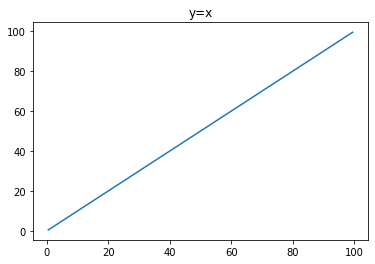

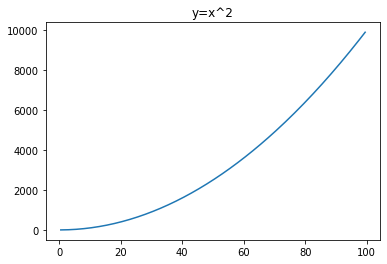

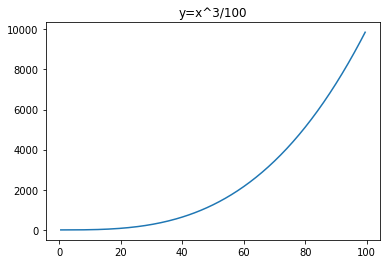

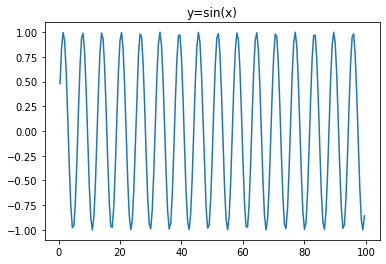

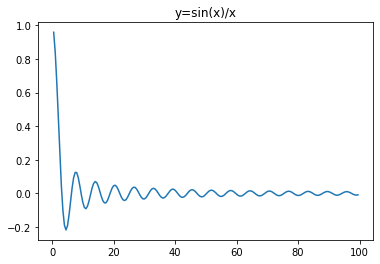

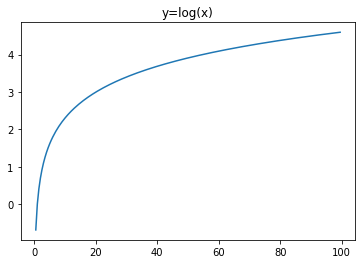

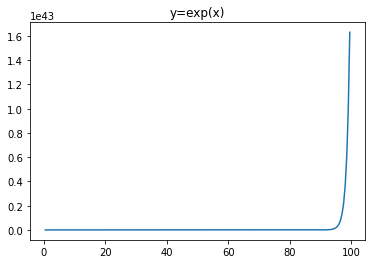

In [ ]:
#1) 
import matplotlib.pyplot as plt
import numpy as np

x = list(np.arange(0.5,100.0,0.5))
# x = list(np.linspace(0.5,100.0,num=50,endpoint=True))

y = x

plt.title('y=x')
plt.plot(x, y)
plt.show()

#2)
import matplotlib.pyplot as plt
import numpy as np

x = list(np.arange(0.5,100.0,0.5))
# x = list(np.linspace(0.5,100.0,num=50,endpoint=True))

y = [x**2 for x in x]

plt.title('y=x^2')
plt.plot(x, y)
plt.show()

#3)
import matplotlib.pyplot as plt
import numpy as np

x = list(np.arange(0.5,100.0,0.5))
# x = list(np.linspace(0.5,100.0,num=50,endpoint=True))

y = [x**3/100 for x in x]

plt.title('y=x^3/100')
plt.plot(x, y)
plt.show()

#4)
import matplotlib.pyplot as plt
import numpy as np

x = list(np.arange(0.5,100.0,0.5))
# x = list(np.linspace(0.5,100.0,num=50,endpoint=True))

y = [np.sin(x) for x in x]

plt.title('y=sin(x)')
plt.plot(x, y)
plt.show()

#5)
import matplotlib.pyplot as plt
import numpy as np

x = list(np.arange(0.5,100.0,0.5))
# x = list(np.linspace(0.5,100.0,num=50,endpoint=True))

y = [np.sin(x)/x for x in x]

plt.title('y=sin(x)/x')
plt.plot(x, y)
plt.show()

#6)
import matplotlib.pyplot as plt
import numpy as np

x = list(np.arange(0.5,100.0,0.5))
# x = list(np.linspace(0.5,100.0,num=50,endpoint=True))

y = [np.log(x) for x in x]

plt.title('y=log(x)')
plt.plot(x, y)
plt.show()

#7)
import matplotlib.pyplot as plt
import numpy as np

x = list(np.arange(0.5,100.0,0.5))
# x = list(np.linspace(0.5,100.0,num=50,endpoint=True))

y = [np.exp(x) for x in x]

plt.title('y=exp(x)')
plt.plot(x, y)
plt.show()

#### 10.

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
dataframe = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
column_std = dataframe.std().idxmax()
row_mean = dataframe.mean(axis=1).idxmin()
print(matrix)
print(f'Column with highest standard deviation: {column_std}')
print(f'Row with lowest mean: {row_mean}')

[[1.23912931 1.85259165 1.13109569 1.54710717 1.32517501]
 [1.27588582 1.96883064 1.49178589 1.38827794 1.07218852]
 [1.90154667 1.9272365  1.34699062 1.26173404 1.75513221]
 [1.46403482 1.82724841 1.09242765 1.89603168 1.48091943]
 [1.08780846 1.3717217  1.33361614 1.16447649 1.16949828]
 [1.15929025 1.86009506 1.13996833 1.59423578 1.24331399]
 [1.536472   1.0628042  1.20393754 1.85174112 1.98172141]
 [1.70058957 1.40243744 1.87283088 1.16707605 1.94696374]
 [1.81453924 1.92352539 1.8007972  1.64952364 1.02834171]
 [1.08011379 1.99932809 1.01268766 1.11071705 1.86482013]
 [1.53709191 1.07507775 1.49238428 1.12452823 1.83551852]
 [1.58889538 1.15584179 1.30139364 1.08199834 1.23425765]
 [1.60032169 1.04684398 1.99259271 1.82676632 1.33844443]
 [1.04979465 1.96297486 1.34890383 1.1215295  1.49907819]
 [1.01209143 1.55261148 1.17377488 1.47272934 1.62940035]
 [1.11701724 1.32877917 1.44087186 1.05079419 1.28525807]
 [1.06779682 1.70137448 1.9940003  1.78965054 1.35966469]
 [1.71860076 1

#### 11.

In [ ]:
dataframe['f'] = dataframe['a'] + dataframe['b'] + dataframe['c'] + dataframe['d'] + dataframe['e']
# dataframe = dataframe.assign(g=np.where(dataframe['f'] < 8, 'LT8', 'GT8'))
dataframe['g'] = np.where(dataframe['f']<8,'LT8','GT8')

num_rows = dataframe.loc[dataframe['g'] == 'LT8', 'g'].count()
print(f'Number of rows where the value in the column "g" is "LT8": {num_rows}')

std_fg_lt8 = dataframe.loc[dataframe['g'] == 'LT8', 'f'].std()
print(f'Standard deviation of the column "f" for rows where the value in the column "g" is "LT8": {std_fg_lt8:.2f}')

std_fg_gt8 = dataframe.loc[dataframe['g'] == 'GT8', 'f'].std()
print(f'Standard deviation of the column "f" for rows where the value in the column "g" is "GT8": {std_fg_gt8:.2f}')


Number of rows where the value in the column "g" is "LT8": 17
Standard deviation of the column "f" for rows where the value in the column "g" is "LT8": 0.57
Standard deviation of the column "f" for rows where the value in the column "g" is "GT8": 0.07


#### 12. 
Numpy uses broadcasting when it encounters arrays with different dimensions. the smaller array is broadcasted to larger array so that they have compatible shapes. For example, 

In [ ]:
import numpy as np

# 2D array with shape (4,3)
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('shape of a:',a.shape)

# 1D array with shape (3,)
b = np.array([13, 14, 15])
print('shape of b:',b.shape)

# b will be broadcasted to the shape of a so that the arithmetic operation can be performed. 
# b will be stretched such that b = [[13, 14, 15],[13, 14, 15],[13, 14, 15],[13, 14, 15]]
c = a + b
print("c:",c)

shape of a: (4, 3)
shape of b: (3,)
c: [[14 16 18]
 [17 19 21]
 [20 22 24]
 [23 25 27]]


From output, we can see that 1D array b is broadcasted to make it a 2D array, so that it becomes compatible for addition with a.

#### 13.

In [ ]:
## function to find the index of the minimum element of the array

import numpy as np

def func_argmin(arr):
    # the np.min finds the minimum value of the array and returns it
    min = np.min(arr)
    # The np.where function returns a tuple of indices, so we need to extract the first element of the first element of the tuple using [0][0].
    index = np.where(arr == min)[0][0]
    return index

arr = np.array([7, 13, 15, 53, 1, -9, 485783457, 87])

check_index = np.argmin(arr)

print(func_argmin(arr))
print(func_argmin(arr) == check_index)

5
True
